In [4]:
import pandas as pd  #To Import data
import numpy as np   #For Numerical analysis
import matplotlib.pyplot as plt #Data plotting and visualization
import seaborn as sns #For Data visualization

In [5]:
training_set = pd.read_csv('Train.csv')

In [6]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
training_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
#Total Population
Total = training_set['Survived'].count()
#Those who survived
survived = training_set[training_set['Survived'] == 1]['Survived'].count()
#Those who dint survive
didnotsurvive = training_set[training_set['Survived'] == 0]['Survived'].count()

In [9]:
print('Total People on Ship              =', training_set['Survived'].count())
print('People who Survived               =', survived)
print('People who did not survive        =',didnotsurvive)
print('Percentage of people who survived =',round(100 * survived/ Total , 2), '%')
print('Percentage of people who died     =',round(100 * didnotsurvive/ Total, 2), '%')

Total People on Ship              = 891
People who Survived               = 342
People who did not survive        = 549
Percentage of people who survived = 38.38 %
Percentage of people who died     = 61.62 %


No of people in class 1   = 216
No of people in class 2   = 184
No of people in class 3   = 491


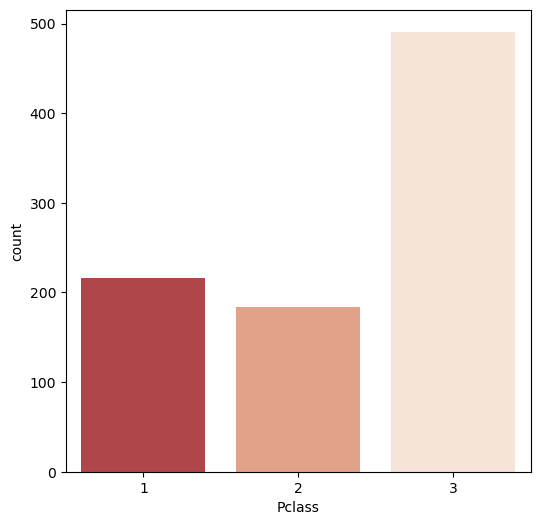

In [10]:
plt.figure(figsize=[6,6])
sns.countplot(x = training_set['Pclass'] , palette = sns.color_palette("RdBu", n_colors=6) )
print('No of people in class 1   =' , len(training_set[training_set['Pclass'] == 1]))
print('No of people in class 2   =', len(training_set[training_set['Pclass'] == 2]))
print('No of people in class 3   =', len(training_set[training_set['Pclass'] == 3]))

<Axes: xlabel='Pclass', ylabel='count'>

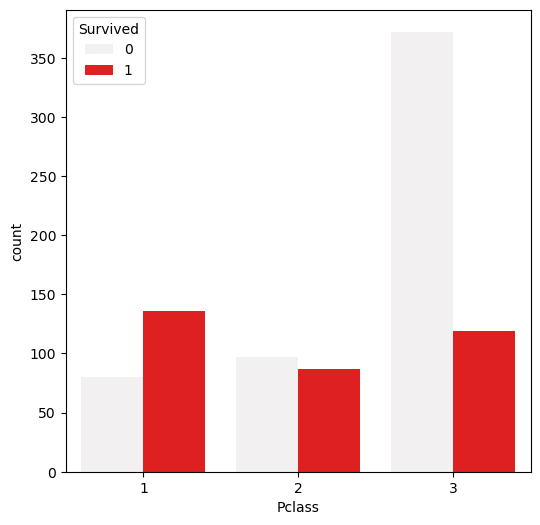

In [11]:
plt.figure(figsize=[6,6])
sns.countplot(x = 'Pclass', hue = 'Survived', data=training_set, color = 'red')

<Axes: xlabel='Sex', ylabel='count'>

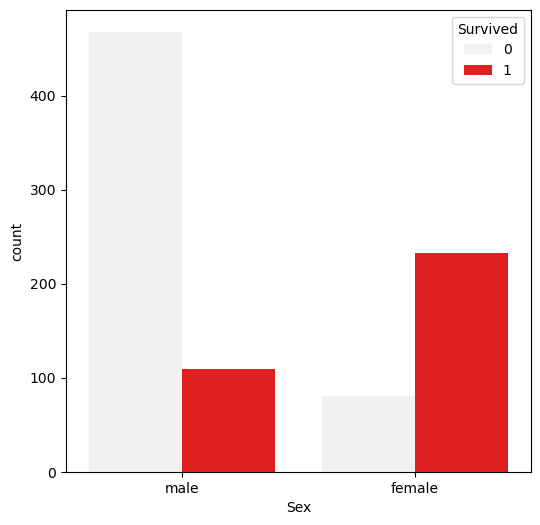

In [12]:
#Female have better chance to survive than male.
plt.figure(figsize=[6,6])
sns.countplot(x = 'Sex', hue = 'Survived', data=training_set , color = 'red')

<Axes: xlabel='Embarked', ylabel='count'>

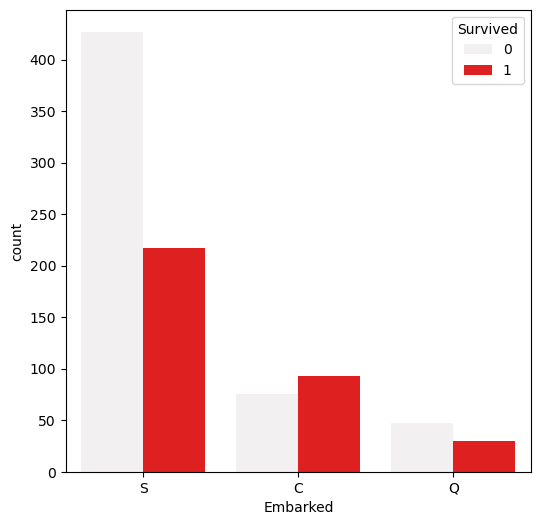

In [13]:
plt.figure(figsize=[6,6])
sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set , color = 'red')

<Axes: xlabel='Age', ylabel='count'>

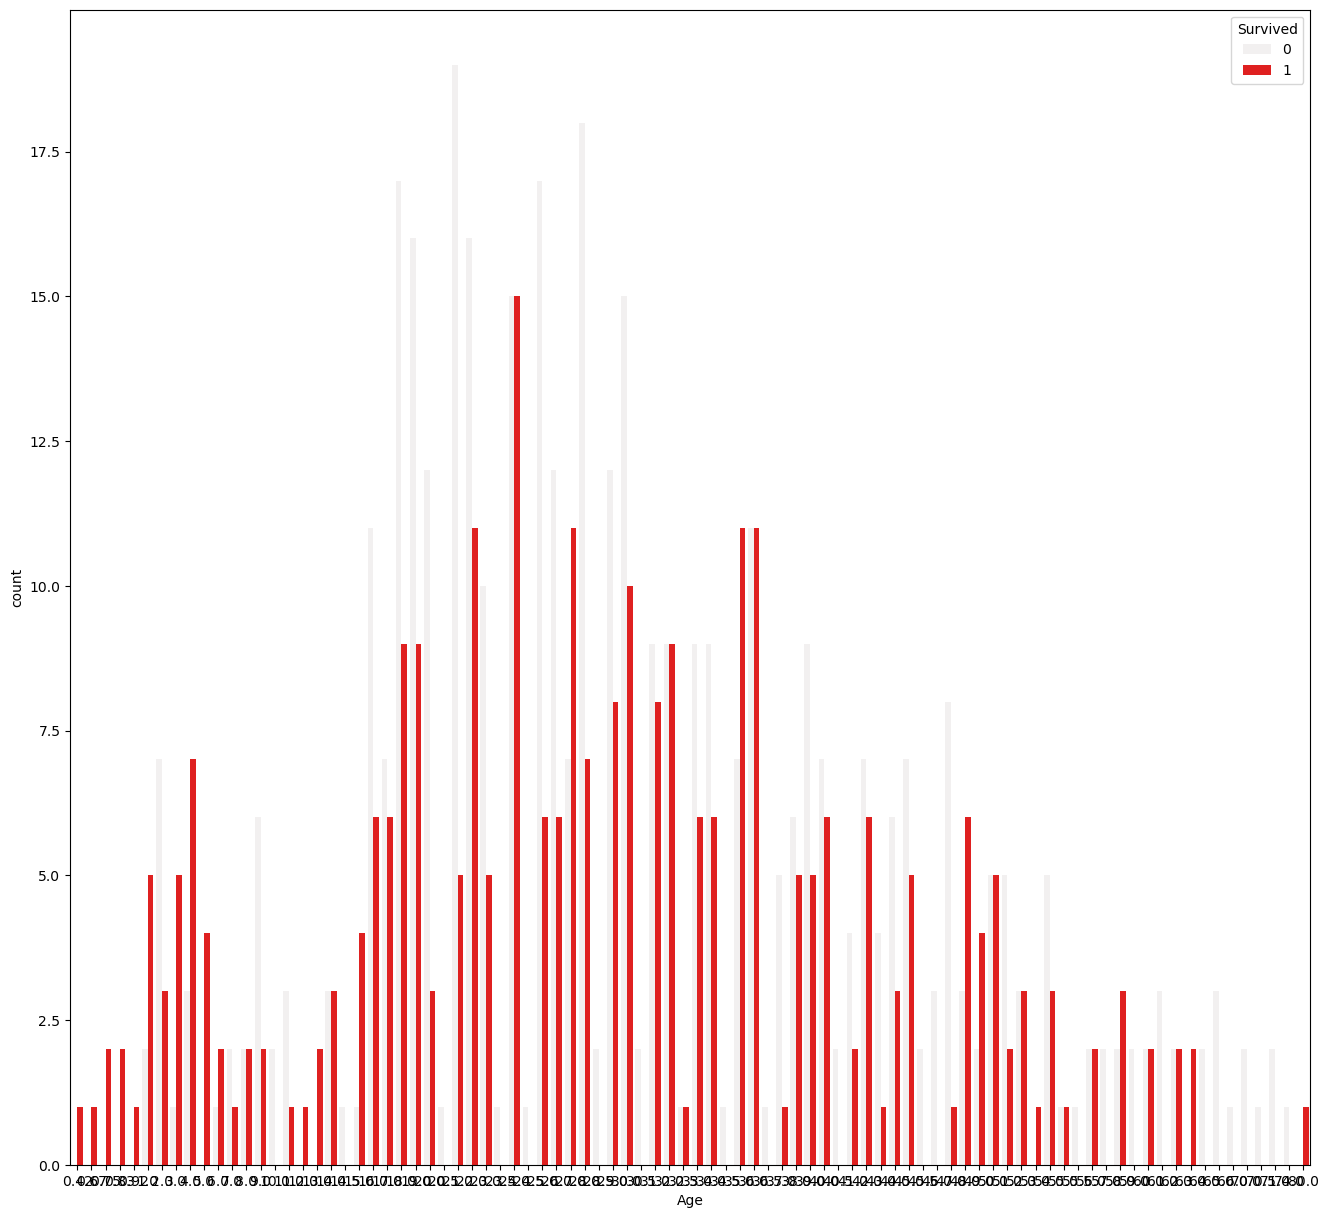

In [14]:
plt.figure(figsize=[16,15])
sns.countplot(x = 'Age', hue = 'Survived', data=training_set ,  color = 'red')

<Axes: >

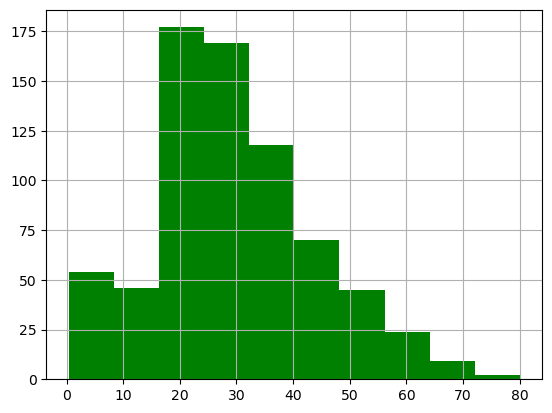

In [15]:
training_set['Age'].hist(bins = 10 , color = 'green')

<Axes: >

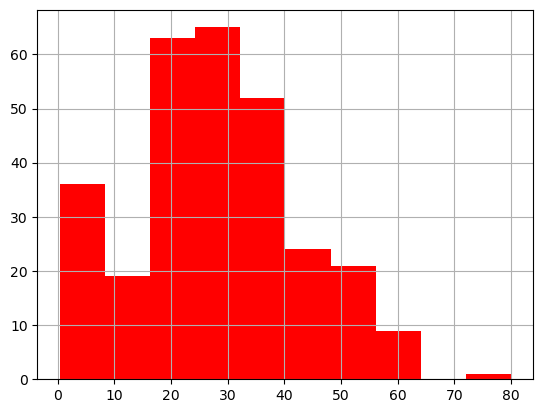

In [16]:
training_set[training_set['Survived']==1]['Age'].hist(bins = 10 , color = 'red')

<Axes: >

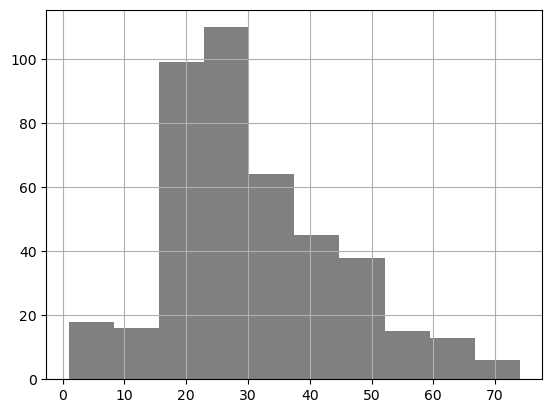

In [17]:
training_set[training_set['Survived']==0]['Age'].hist(bins = 10 , color = 'grey')

<Axes: >

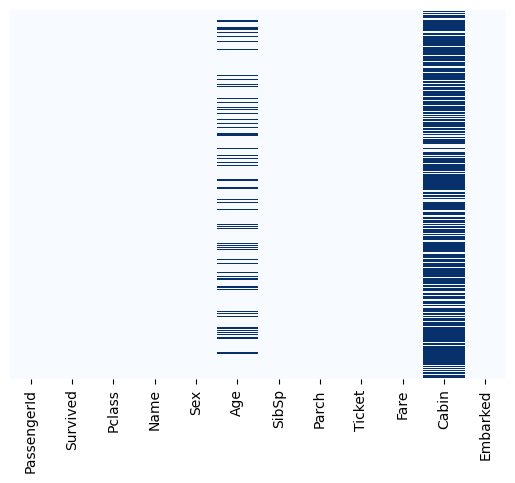

In [18]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [19]:
training_set.drop(['Name', 'Ticket', 'PassengerId' ,  'Cabin'],axis=1,inplace=True)

In [20]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: >

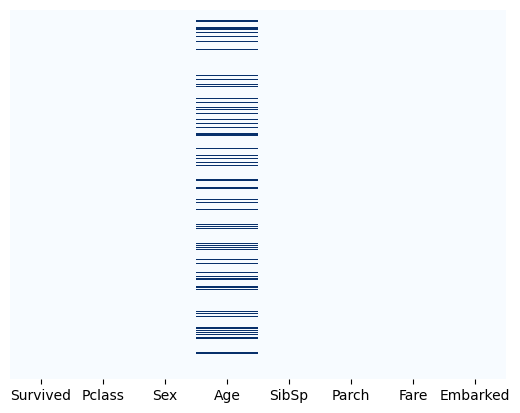

In [21]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [22]:
tot_avg_age = training_set['Age'].mean()
male_avg_age = training_set[training_set['Sex'] =='male']['Age'].mean()
female_avg_age = training_set[training_set['Sex'] =='female']['Age'].mean()
print("male avg age = " , round(male_avg_age, 2))
print("female avg age = " , round(female_avg_age, 2))

male avg age =  30.73
female avg age =  27.92


In [23]:
training_set["Age"].fillna(training_set.groupby("Sex")["Age"].transform("mean"), inplace=True) 

In [24]:
male = pd.get_dummies(training_set['Sex'], drop_first = True)

In [25]:
training_set = pd.concat([training_set, male], axis=1)

In [26]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [27]:
emb_dumm = pd.get_dummies(training_set['Embarked'], drop_first = True)

In [28]:
emb_dumm.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
training_set = pd.concat([training_set, emb_dumm], axis=1)

In [30]:
training_set.head()     

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [31]:
training_set.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [32]:
X = training_set.drop('Survived',axis=1).values
y = training_set['Survived'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<Axes: >

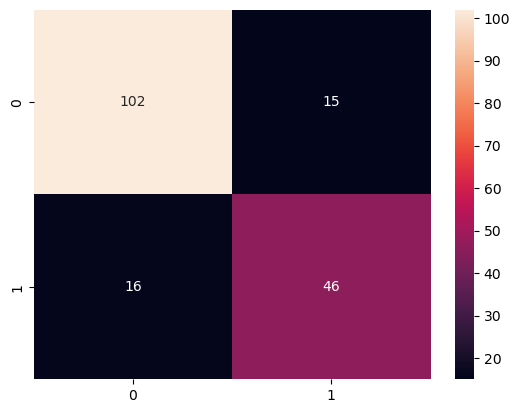

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True , fmt="d")